<h1>
<center>Qualifying Red Wine</center>
</h1>

<h1>
<center>Avery Lee</center>
</h1>

In [1]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import sklearn.kernel_ridge
import pandas as pd 


In [2]:
# if you are using Colab 

from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load training, test, and new batch 
path_to_train = '/content/drive/My Drive/Colab Notebooks/wine_training.csv'
path_to_test = '/content/drive/My Drive/Colab Notebooks/wine_test.csv'
path_to_new = '/content/drive/My Drive/Colab Notebooks/wine_new_batch.csv'

d_train = pd.read_csv(path_to_train, header=None) # 1115x12
d_test = pd.read_csv(path_to_test, header=None) # 479x12
d_new = pd.read_csv(path_to_new, header=None) # 5x11

X_train = d_train.iloc[:, :-1]
Y_train = d_train.iloc[:, -1]

X_test = d_test.iloc[:, :-1]
Y_test = d_test.iloc[:, -1]

X_new = d_new

# normalize and center the data (mean = 0, sd = 1)
# TRAIN
X_train_N = X_train.shape[0]
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_normal = (X_train - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)

Y_train_N = Y_train.shape[0]
Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)
Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

# TEST 
X_test_N = X_test.shape[0]
X_test_normal = (X_test - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std

# NEW BATCH 
X_new_N = X_new.shape[0]
X_new_normal = (X_new - np.matlib.repmat(X_train_mean, X_new_N, 1))/np.matlib.repmat(X_train_std, X_new_N, 1)

In [4]:
### TASK 1: Use linear regression (least squares) to fit a linear model to the training set. 
linreg = LinearRegression().fit(X_train_normal, Y_train_normal)

In [5]:
### TASK 2: Use kernel ridge regression to fit a nonlinear model
### to the training set using Gaussian (RBF) kernel and Laplacian kernel. 
### COMBINED WITH TASK 3 

In [6]:
### TASK 3: Use 10-fold cross validation to tune length scale sigma and regularization
### parameter lambda for each of the above kernels. Report your choices of optimal sigma and lambda
### and provide a clear explanation of why and how you picked those values. 

# GAUSSIAN RBF 1ST TRY
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(0, 4, K_sgm)
lmbd = np.linspace(-6, 1, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()


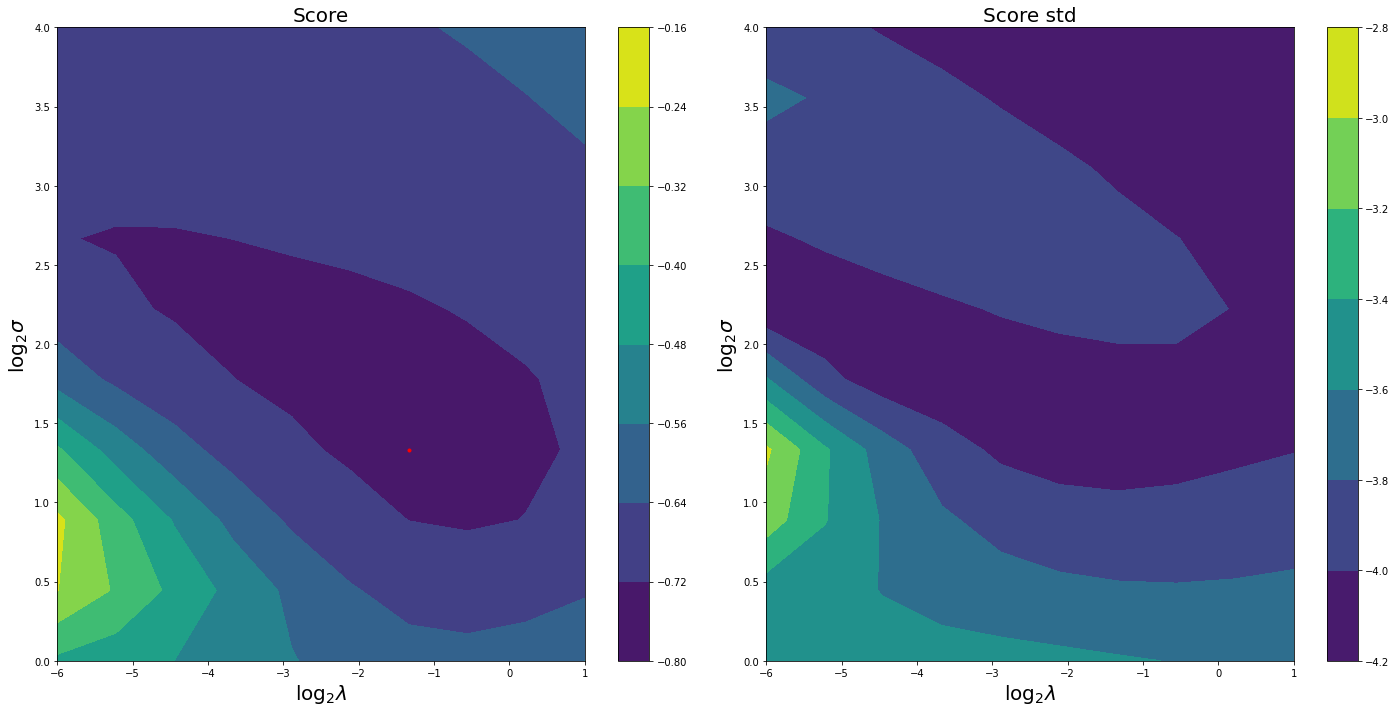

In [7]:
# VISUALIZE RBF 1ST TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [8]:
# GAUSSIAN RBF 2ND TRY
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(0.75, 2.75, K_sgm)
lmbd = np.linspace(-5.75, 0.75, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='rbf')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2*(2**sgm[i])**2)

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring= 'neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()


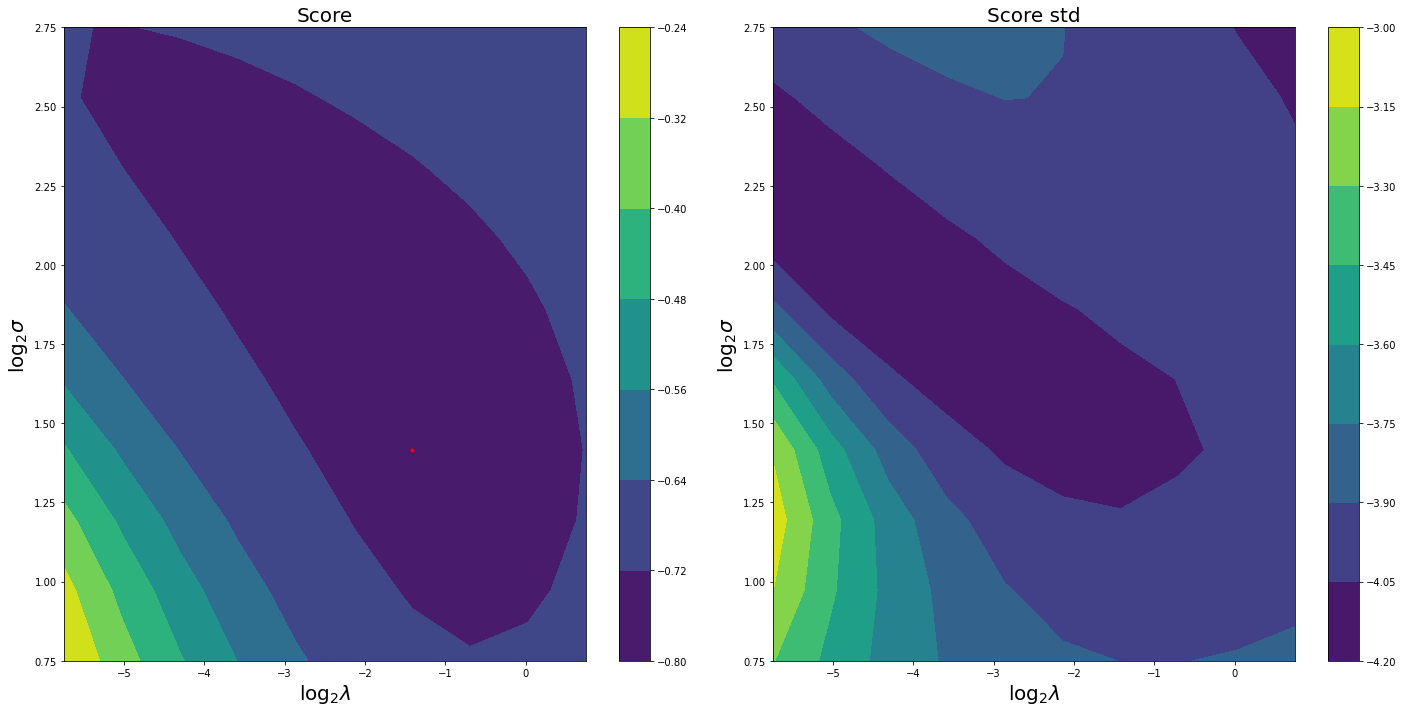

In [9]:
# VISUALIZE RBF 2ND TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [10]:
# RBF ALPHA, GAMMA, LAMBDA, SIGMA 
# alpha = lambda, sigma = sqrt(1/(2*gamma))
rbf_KRR = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha=2**(lmbd[ij_max[1]]), gamma=1/(2*(2**sgm[ij_max[0]])**2))
rbf_KRR.fit(X_train_normal, Y_train_normal)
RBF_LAMBDA = rbf_KRR.alpha
RBF_SIGMA = np.sqrt(1/(2*rbf_KRR.gamma))
print(RBF_LAMBDA, RBF_SIGMA, rbf_KRR.gamma)

0.3745767692191703 2.6696797083400683 0.07015387801933583


In [11]:
# LAPLACIAN 1ST TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(0, 7, K_sgm)
lmbd = np.linspace(-5, 2.5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()



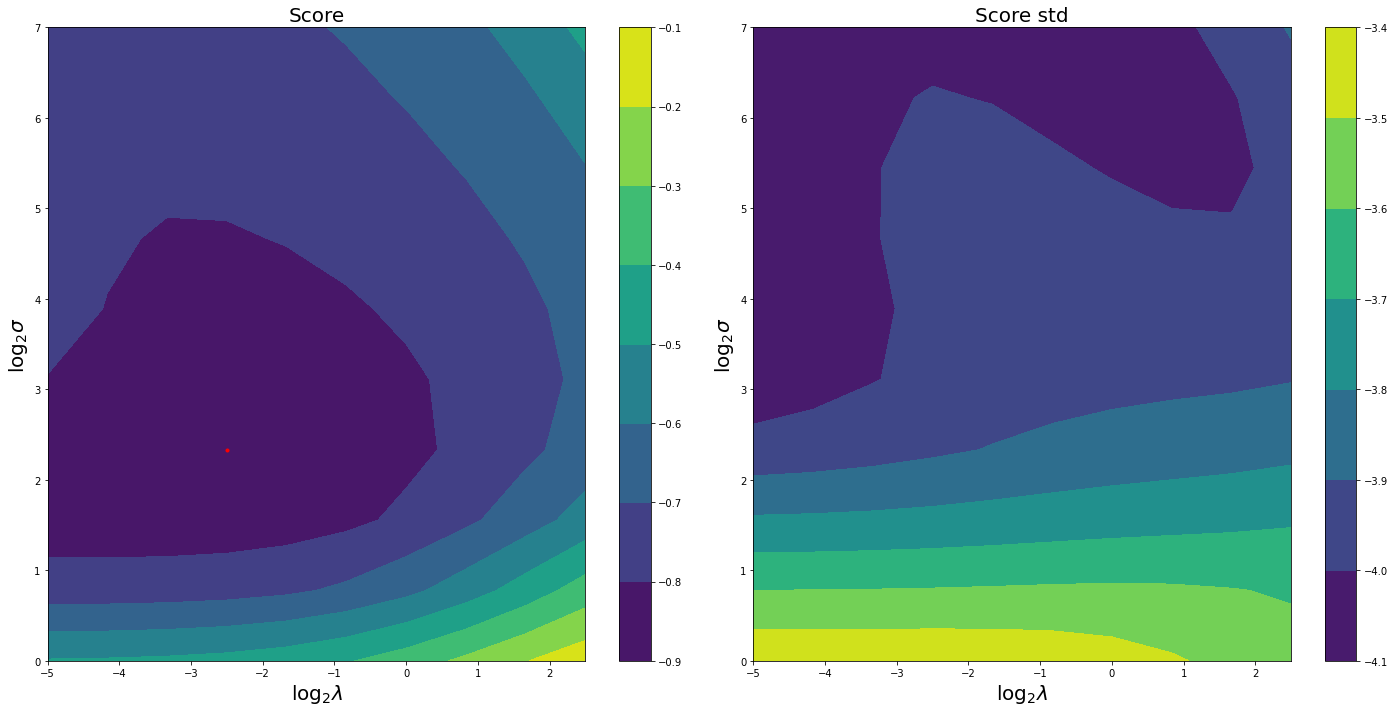

In [12]:
# VISUALIZE LAPLACIAN 1ST TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [13]:
# LAPLACIAN 2ND TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1, 5, K_sgm)
lmbd = np.linspace(-5, 1, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])
  
  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()



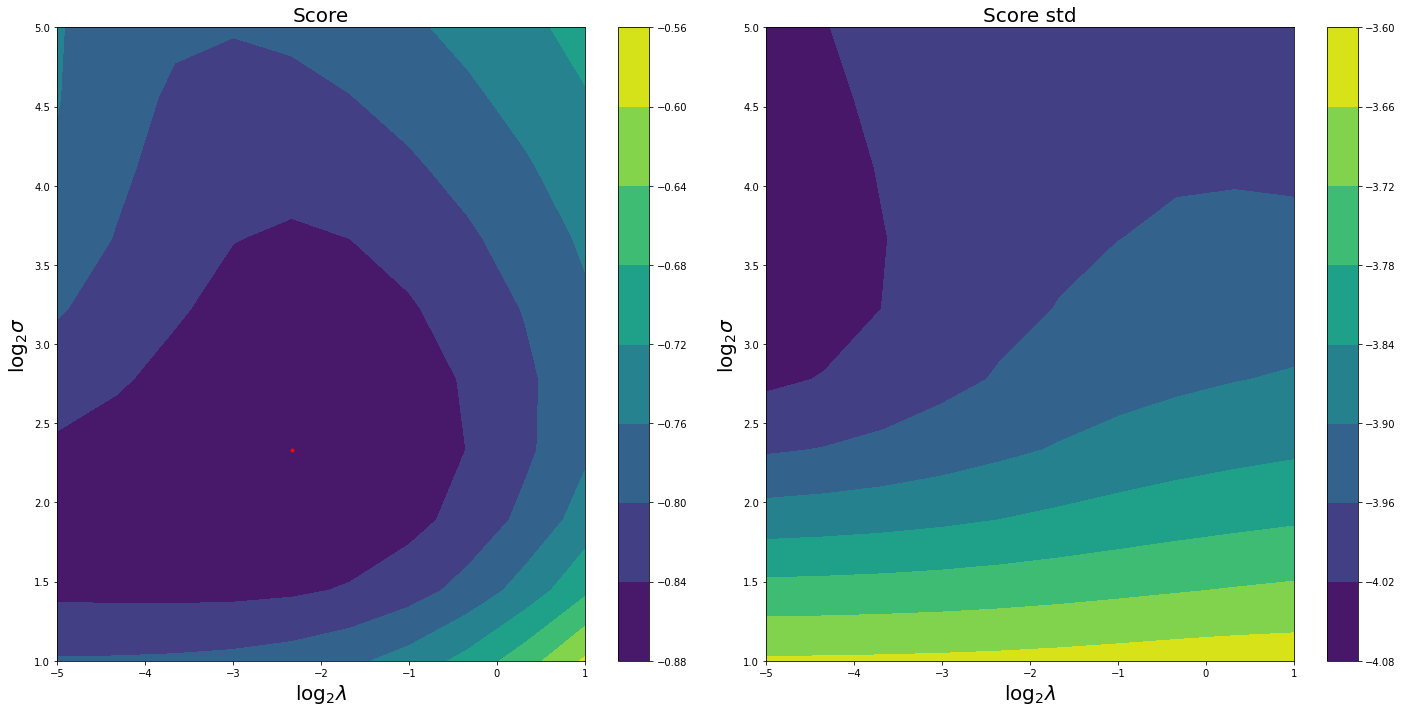

In [14]:
# VISUALIZE LAPLACIAN 2ND TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [15]:
# LAPLACIAN 3RD TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.25, 4, K_sgm)
lmbd = np.linspace(-5, -0.5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()



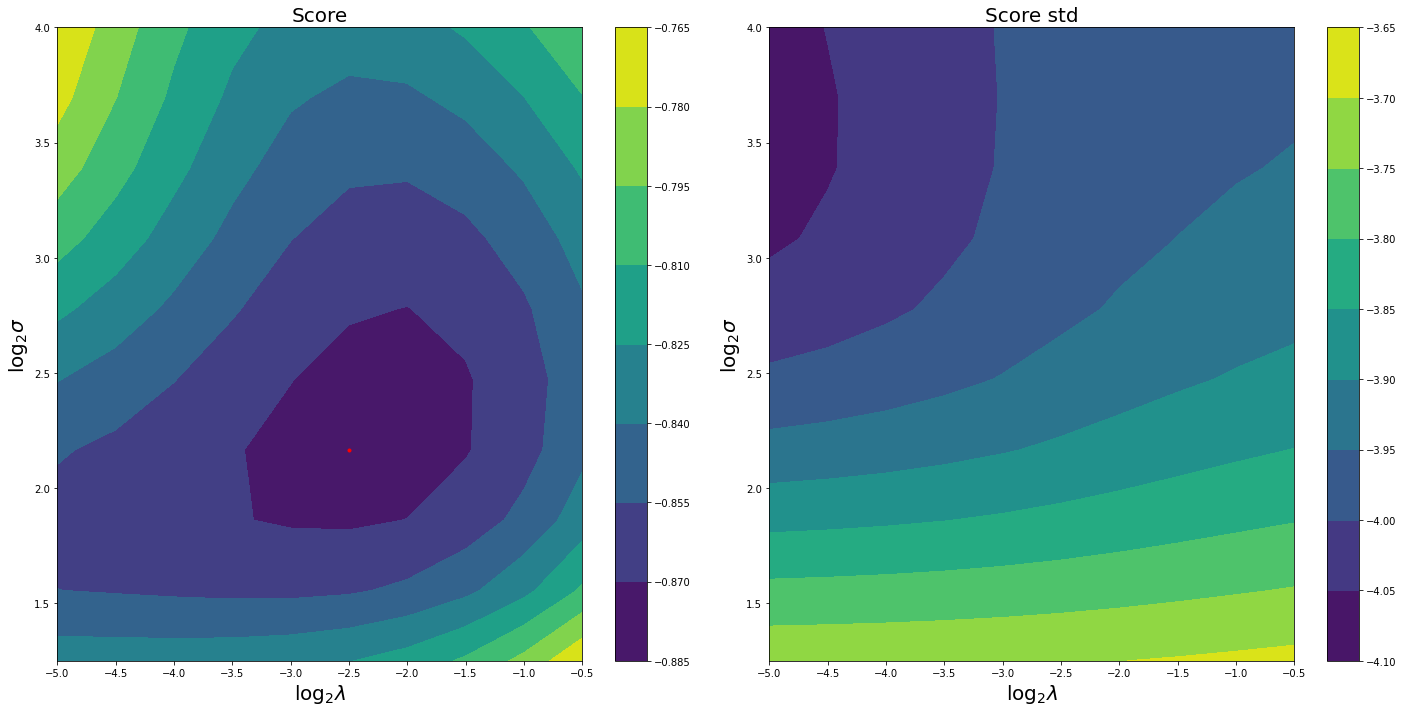

In [16]:
# VISUALIZE LAPLACIAN 3RD TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [17]:
# LAPLACIAN 4TH TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(1.75, 2.75, K_sgm)
lmbd = np.linspace(-3.5, -1.5, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()


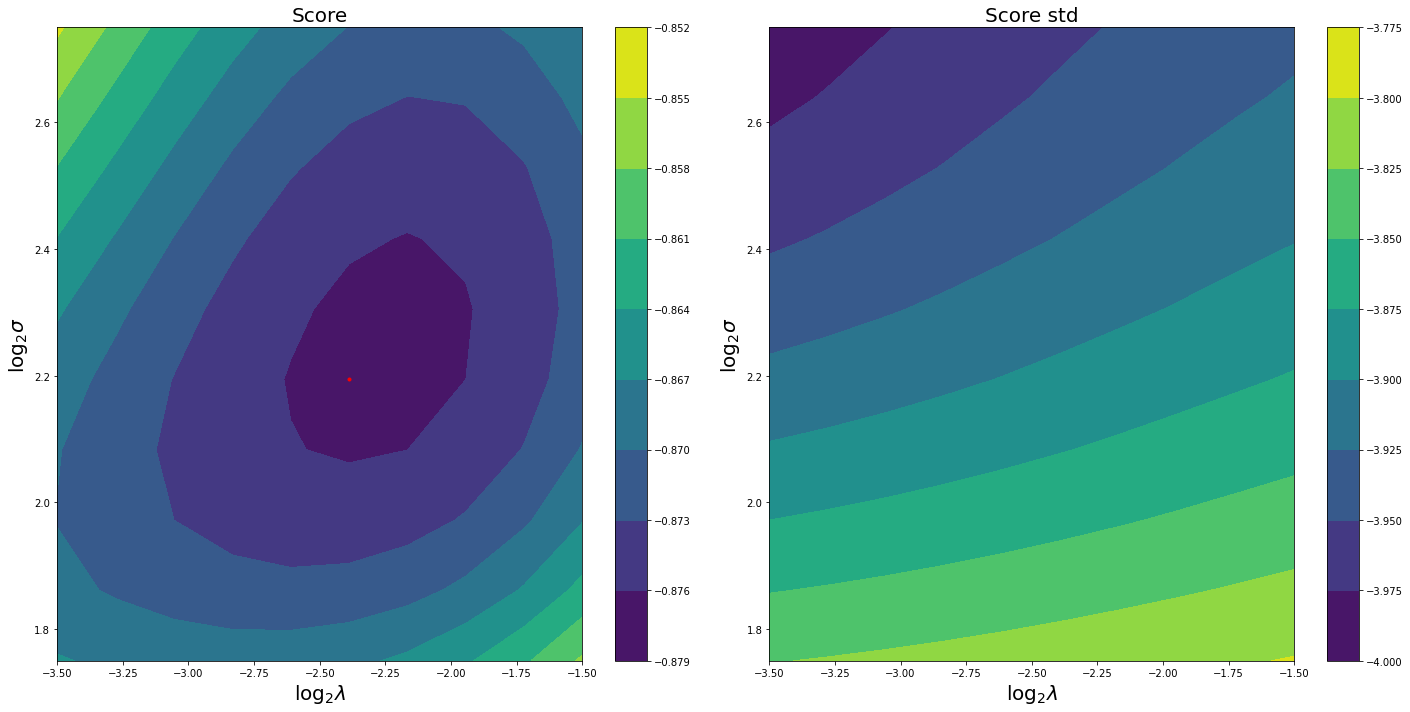

In [18]:
# VISUALIZE LAPLACIAN 4TH TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [19]:
# LAPLACIAN 5TH TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(2, 2.5, K_sgm)
lmbd = np.linspace(-2.75, -1.75, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()



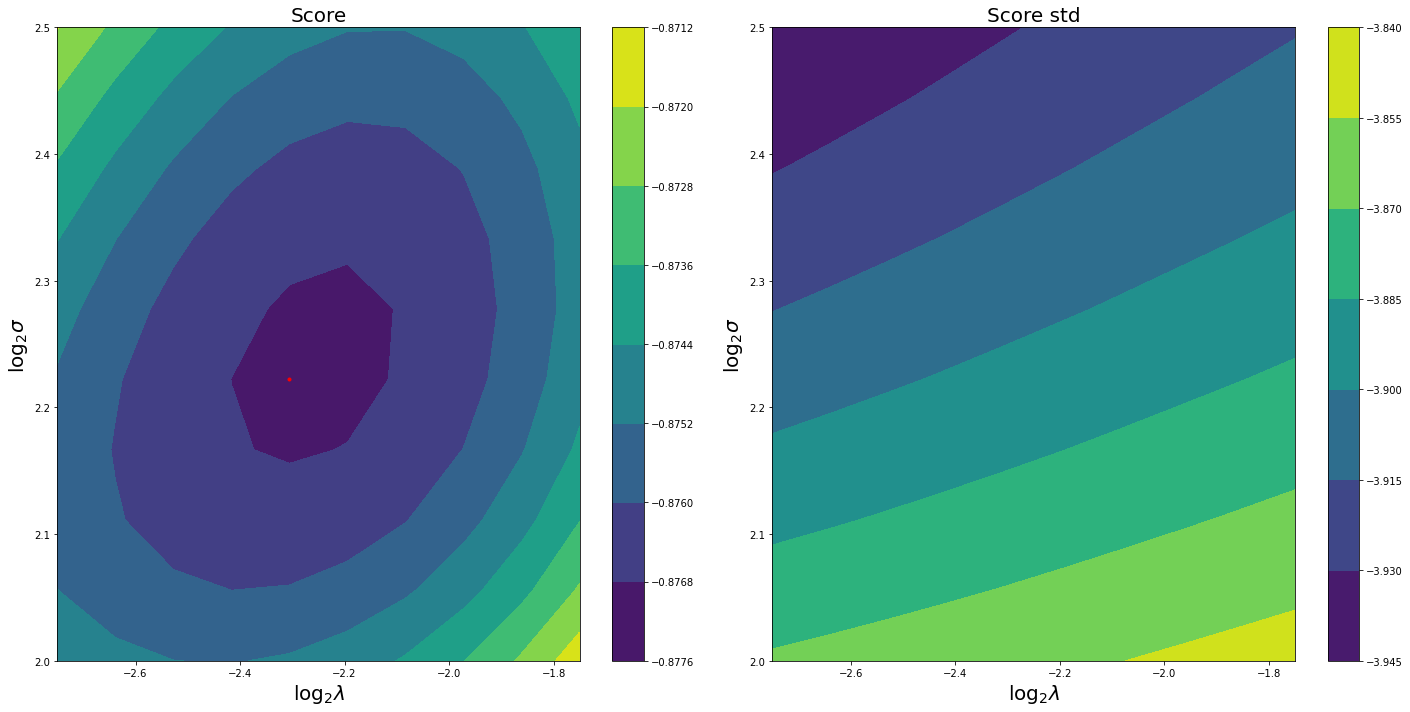

In [20]:
# VISUALIZE LAPLACIAN 5TH TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [21]:
# LAPLACIAN 6TH TRY 
K_sgm = 10
K_lmbd = 10

sgm = np.linspace(2.15, 2.35, K_sgm)
lmbd = np.linspace(-2.5, -2.0, K_lmbd)

scores = np.zeros((K_sgm, K_lmbd))
scores_std = np.zeros((K_sgm, K_lmbd))

KRR_CV = skl.kernel_ridge.KernelRidge(kernel='laplacian')

for i in range(K_sgm):

  KRR_CV.gamma = 1/(2**sgm[i])

  for j in range(K_lmbd): 

    KRR_CV.alpha = (2**lmbd[j])
    this_score = skl.model_selection.cross_val_score(KRR_CV, X_train_normal, Y_train_normal, scoring='neg_mean_squared_error', cv=5)

    scores[i,j] = (np.mean(this_score))
    scores_std[i,j] = (np.std(this_score))

ij_max = np.array( np.where( scores == scores.max() ), dtype=int).flatten()



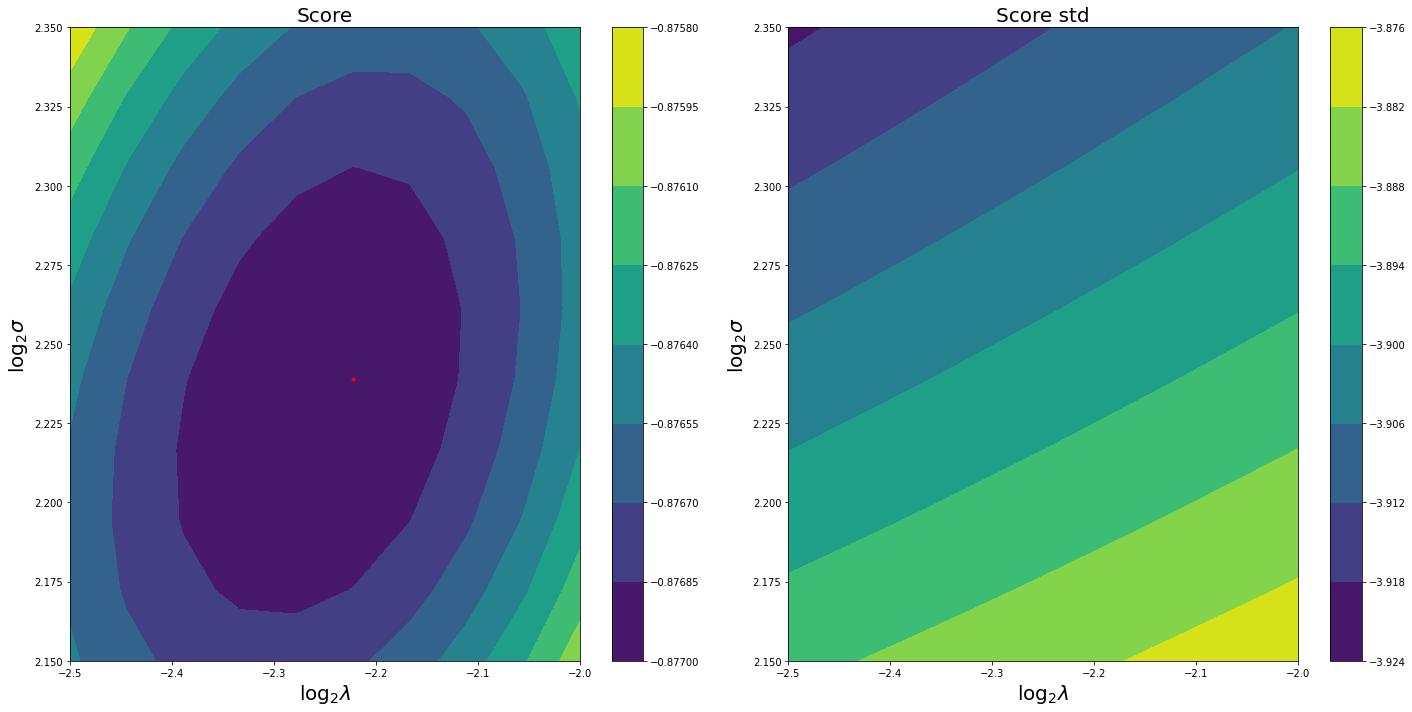

In [22]:
# VISUALIZE LAPLACIAN 6TH TRY 
lv, sv = np.meshgrid(lmbd, sgm)

fig, ax = plt.subplots(1,2, figsize=(20,10))

cm0 = ax[0].contourf(lv, sv, np.log2(np.abs(scores)))
ax[0].plot(lmbd[ij_max[1]], sgm[ij_max[0]], 'r.')
ax[0].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[0].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[0].set_title('Score', fontsize=20)
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].contourf(lv, sv, np.log2(np.abs(scores_std))) # log of abs value of the scores -> smaller the better 
ax[1].set_xlabel('$\log_2\lambda$', fontsize=20)
ax[1].set_ylabel('$\log_2\sigma$', fontsize=20)
ax[1].set_title('Score std', fontsize=20)
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [23]:
# LAPLACIAN ALPHA, GAMMA, LAMBDA, SIGMA 
# alpha = lambda, sigma = 1/gamma
lap_KRR = skl.kernel_ridge.KernelRidge(kernel='laplacian', alpha=2**(lmbd[ij_max[1]]), gamma=1/(2**sgm[ij_max[0]]))
lap_KRR.fit(X_train_normal, Y_train_normal)
LAP_LAMBDA = lap_KRR.alpha
LAP_SIGMA = 1/lap_KRR.gamma
print(LAP_LAMBDA, LAP_SIGMA, lap_KRR.gamma)

0.2143109957132682 4.720333816447721 0.21184942397835504


In [24]:
### TASK 4: Provide a table reporting the training and test mean squared 
### errors (MSEs) of all 3 models: linear regression, gaussian kernels, laplacian kernels. 
# LINEAR REGRESSION MSE
linreg_train_pred = linreg.predict(X_train_normal)
linreg_test_pred = linreg.predict(X_test_normal)
linreg_train_MSE = mean_squared_error(Y_train_normal, linreg_train_pred)
linreg_test_MSE = mean_squared_error(Y_test_normal, linreg_test_pred)

# RBF MSE
rbf_train_pred = rbf_KRR.predict(X_train_normal)
rbf_test_pred = rbf_KRR.predict(X_test_normal)
rbf_train_MSE = mean_squared_error(Y_train_normal, rbf_train_pred)
rbf_test_MSE = mean_squared_error(Y_test_normal, rbf_test_pred)

# LAPLACIAN MSE 
lap_train_pred = lap_KRR.predict(X_train_normal)
lap_test_pred = lap_KRR.predict(X_test_normal)
lap_train_MSE = mean_squared_error(Y_train_normal, lap_train_pred)
lap_test_MSE = mean_squared_error(Y_test_normal, lap_test_pred)

print(linreg_train_MSE, linreg_test_MSE, rbf_train_MSE, rbf_test_MSE, lap_train_MSE, lap_test_MSE)


0.6278484956554817 0.7471696905187128 0.41314068061795833 0.6652874839774205 0.05903121648533451 0.6098381277114132


In [25]:
### TASK 5: Use your 3 models to predict the quality of the new batch
### of wines and report the output of each model on the 0-10 scale.
linreg_new_pred_norm = linreg.predict(X_new_normal)
linreg_new_pred = (linreg_new_pred_norm * Y_train_std) + Y_train_mean

rbf_new_pred_norm = rbf_KRR.predict(X_new_normal)
rbf_new_pred = (rbf_new_pred_norm * Y_train_std) + Y_train_mean

lap_new_pred_norm = lap_KRR.predict(X_new_normal)
lap_new_pred = (lap_new_pred_norm * Y_train_std) + Y_train_mean

print(linreg_new_pred)
print(rbf_new_pred)
print(lap_new_pred)


[6.00469789 5.28767761 5.56363072 6.067022   5.94248207]
[6.07746581 5.47974726 5.48693659 6.24049461 6.19800613]
[6.07118653 5.45456294 5.63216023 6.00464107 6.03443989]


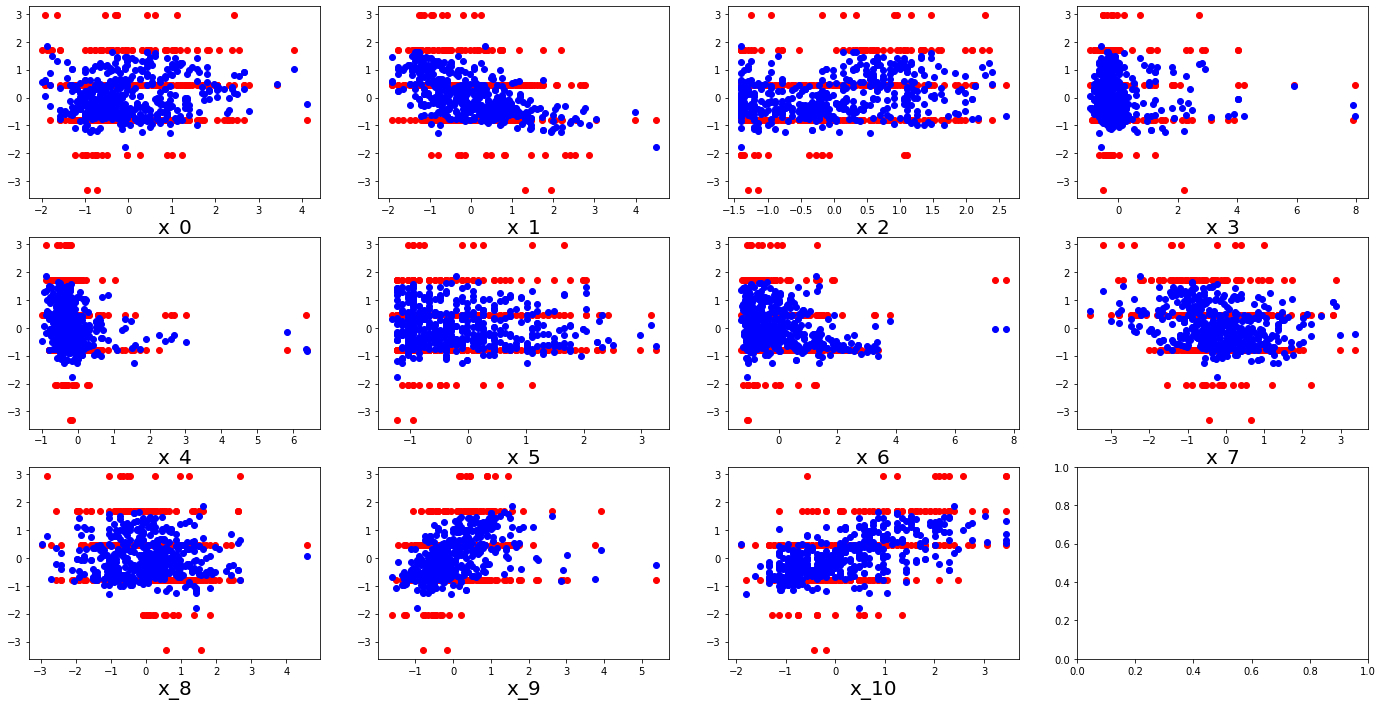

In [26]:
# STUDY THE FEATURES 
# GAUSSIAN RBF FEATURES
row = 3
col = 4
fig, ax = plt.subplots(row, col, figsize=(24,12))
rbf_test = rbf_KRR.predict(X_test_normal)
for j in range(row):
  for i in range(col):
    try:
      index = i+j*col
      ax[j][i].scatter(X_test_normal.iloc[:, index], Y_test_normal, color='r', label='Test')
      ax[j][i].scatter(X_test_normal.iloc[:, index], rbf_test, color='b', label='Prediction')
      ax[j][i].set_xlabel('x_'+str(index), fontsize=20)
    except:
      continue


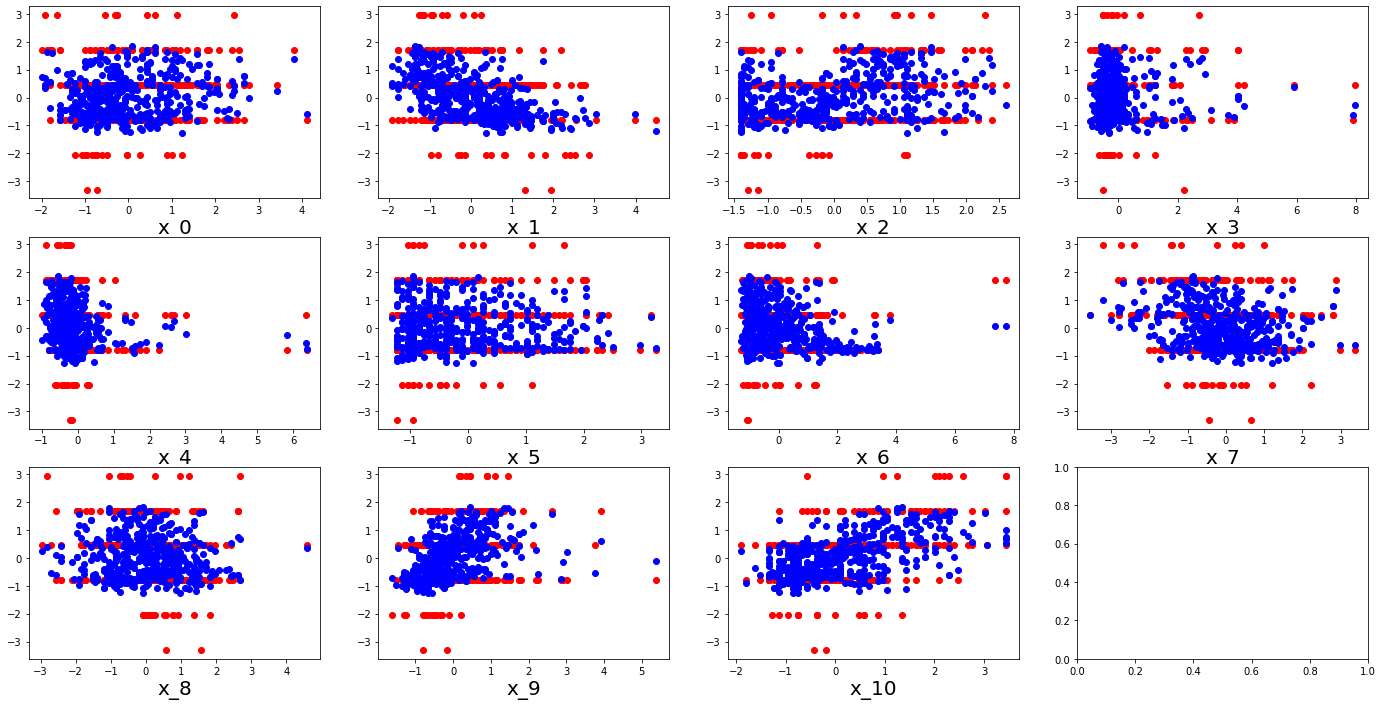

In [27]:
# LAPLACIAN FEATURES 
fig, ax = plt.subplots(row, col, figsize=(24,12))
lap_test = lap_KRR.predict(X_test_normal)
for j in range(row):
  for i in range(col):
    try:
      index = i+j*col
      ax[j][i].scatter(X_test_normal.iloc[:, index], Y_test_normal, color='r', label='Test')
      ax[j][i].scatter(X_test_normal.iloc[:, index], lap_test, color='b', label='Prediction')
      ax[j][i].set_xlabel('x_'+str(index), fontsize=20)
    except:
      continue
